In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data_510.csv", sep=",")
long = data.set_index('Unnamed: 0').stack().to_frame().reset_index()\
           .rename(columns={'level_1': 'variable', 0: 'value'})
long = long.drop(["Unnamed: 0"], axis = 1)
data = data.drop(["Unnamed: 0"], axis = 1)

In [33]:
def MI(x,y,Nbins=21, plot=False):
    bins = np.linspace(np.min(x),np.max(x),Nbins)
    eps=np.spacing(1)
    x_marginal = np.histogram(x,bins=bins)[0]
    x_marginal = x_marginal/x_marginal.sum()
    y_marginal = np.array(np.histogram(y,bins=bins)[0])
    y_marginal = y_marginal/y_marginal.sum()
    xy_joint = np.array(np.histogram2d(x,y,bins=(bins,bins))[0])
    xy_joint = xy_joint/xy_joint.sum()
    MI=np.sum(xy_joint*np.log(xy_joint/(x_marginal[:,None]*y_marginal[None,:]+eps)+eps))
    if plot:
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(xy_joint.T,origin='lower')
        plt.title('joint')
        plt.subplot(1,2,2)
        plt.imshow((x_marginal[:,None]*y_marginal[None,:]).T,origin='lower')
        plt.title('product of marginals')
        plt.suptitle('Mutual information: %f'%MI)

    return(MI)
#MI(x,y)
#MI(np.random.rand(len(x))*2-1,np.random.rand(len(x))*2-1)

#xn=np.random.randn(len(x))
#yn=np.random.randn(len(x))
#yn1=xn+yn
#MI(xn,yn)
#MI(xn,yn1);

In [31]:
for node in data.keys():
    print(f"\n---{node}---")
    print(f"mean: {np.mean(data[node])}")
    print(f"std: {np.std(data[node])}")
    for node_2 in data.keys():
        a, b = np.array(data[node].tolist()), np.array(data[node_2].tolist())
        ab = np.stack((a,b))
        cov = np.corrcoef(ab)
        if node != node_2:
            print(f"corr with {node_2}: {cov[0,1]} \t MI {node} to {node_2}: {MI(data[node_2], data[node], Nbins=21)}")


---A---
mean: 1.3698896094718327
std: 1.1014896644832854
corr/spear with B: -0.0625/-0.1597 	 MI A to B: 0.2558
corr/spear with C: 0.0191/0.0258 	 MI A to C: 0.8352
corr/spear with D: 0.2421/0.2522 	 MI A to D: 1.1992
corr/spear with E: -0.0304/0.0215 	 MI A to E: 1.2315
corr/spear with F: 0.2852/0.4183 	 MI A to F: 1.5705

---B---
mean: 0.5407399611575715
std: 2.236391824250834
corr/spear with A: -0.0625/-0.1597 	 MI B to A: 1.2231
corr/spear with C: -0.0465/-0.1397 	 MI B to C: 1.2062
corr/spear with D: -0.1412/-0.1504 	 MI B to D: 1.4405
corr/spear with E: 0.1418/0.2457 	 MI B to E: 1.1255
corr/spear with F: -0.0517/-0.2268 	 MI B to F: 1.1661

---C---
mean: -0.26510669570840895
std: 1.5564606014451707
corr/spear with A: 0.0191/0.0258 	 MI C to A: 1.1754
corr/spear with B: -0.0465/-0.1397 	 MI C to B: 0.2868
corr/spear with D: 0.1599/0.1744 	 MI C to D: 1.1947
corr/spear with E: -0.1118/-0.1870 	 MI C to E: 1.4074
corr/spear with F: 0.0721/0.0433 	 MI C to F: 0.9749

---D---
mean: 

In [34]:
fig, axs = plt.subplots(4, figsize=(14,14))
for i, node in enumerate(data.keys()):
    axs[i].title.set_text(f"{node}")
    axs[i].hist(data[node], bins=25)
plt.show()


---A---
mean: 2.0
std: 0.0
corr/spear with B: nan/nan 	 MI A to B: -0.0000
corr/spear with C: nan/nan 	 MI A to C: -0.0000
corr/spear with D: nan/nan 	 MI A to D: -0.0000
corr/spear with E: nan/nan 	 MI A to E: nan
corr/spear with F: nan/nan 	 MI A to F: nan

---B---
mean: -0.08605124197814916
std: 1.6704648056084277
corr/spear with A: nan/nan 	 MI B to A: nan
corr/spear with C: -0.1123/0.0727 	 MI B to C: 1.1323
corr/spear with D: 0.0098/0.1230 	 MI B to D: 1.3224
corr/spear with E: -0.0896/-0.1861 	 MI B to E: 1.3326
corr/spear with F: 0.0143/0.1040 	 MI B to F: 1.2400

---C---
mean: -0.6628878517062874
std: 1.4889773814091438
corr/spear with A: nan/nan 	 MI C to A: nan
corr/spear with B: -0.1123/0.0727 	 MI C to B: 0.6060
corr/spear with D: -0.0636/-0.0133 	 MI C to D: 1.2885
corr/spear with E: -0.1050/-0.2552 	 MI C to E: 2.0314
corr/spear with F: 0.0101/-0.0692 	 MI C to F: 1.1927

---D---
mean: 1.4696787352289102
std: 1.148915009951674
corr/spear with A: nan/nan 	 MI D to A: nan

C:\Users\asbjo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\asbjo\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
C:\Users\asbjo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
<ipython-input-33-3961f56b9a84>:7: RuntimeWarning: invalid value encountered in true_divide
  y_marginal = y_marginal/y_marginal.sum()
<ipython-input-33-3961f56b9a84>:9: RuntimeWarning: invalid value encountered in true_divide
  xy_joint = xy_joint/xy_joint.sum()


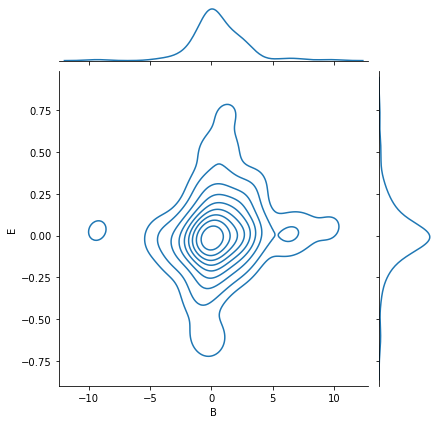